TASK-3
CAR PRICE PREDICTION

In [90]:
#IMPORTING NECESSARY LIBARARIES

import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [91]:
#READING CSV FILE
car=pd.read_csv('car data.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [92]:
#IGNORING THE WARNINGS
warnings.filterwarnings("ignore")

In [93]:
#NUMBER OF FIRST 5 ROWS
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [94]:
#NUMBER OF LAST 5 ROWS
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [95]:
#NUMBER OF ROWS AND COLUMNS IN THE DATASET
car.shape

(301, 9)

In [96]:
#INFORMATION ABOUT THE DATASET
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [97]:
#CHECKING THE NULL VALUES
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

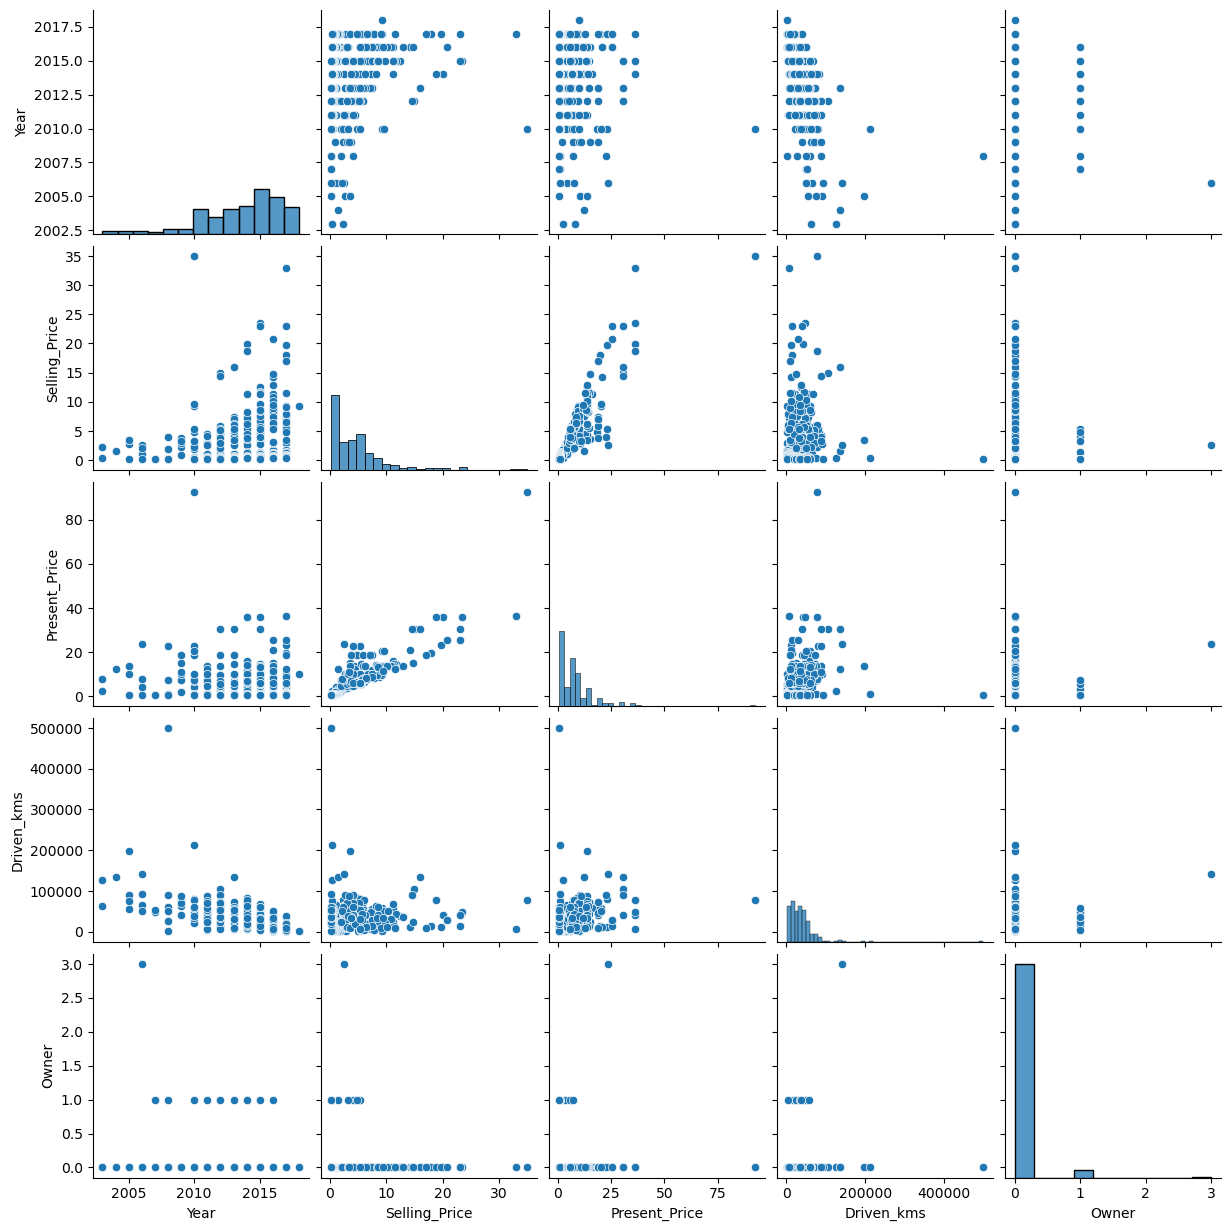

In [98]:
#VISUAL REPRESENTATION OF DATASET
sns.pairplot(car)
plt.show()

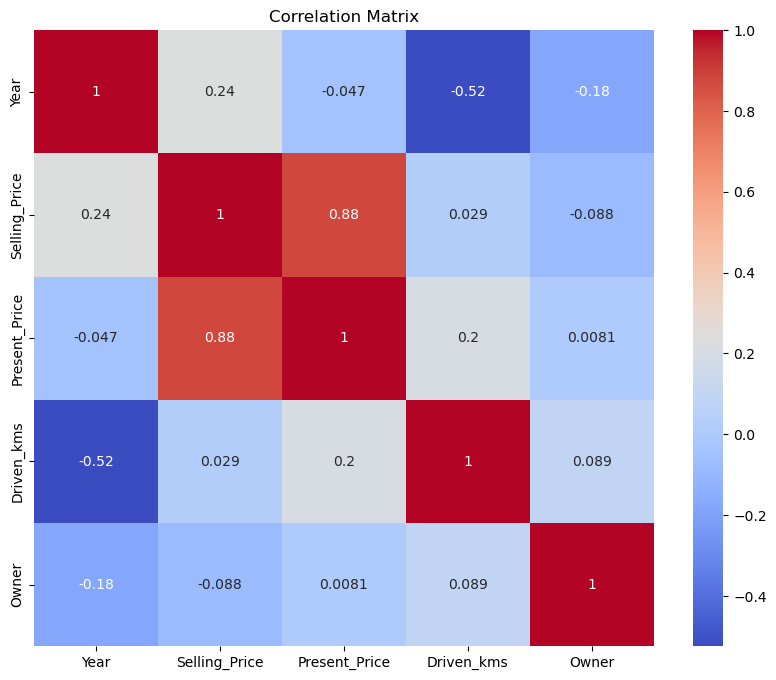

In [99]:
#CORRELATION_MATRIX
corr_matrix = car.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [100]:
#DROPPING OF COLUMNS
car=car.drop(columns=["Owner","Car_Name"])
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [101]:
#CHECKING THE CATEGORICAL DATA
print(car.Fuel_Type.value_counts())
print(car.Selling_type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [102]:
#ENCODING OF CATEGORICAL DATA
car.replace({"Fuel_Type":{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)
car.replace({"Selling_type":{'Dealer':1,'Individual':0}},inplace=True)
car.replace({"Transmission":{'Manual':1,'Automatic':0}},inplace=True)
#DISPLAYING THE ENCODED DATA
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,1,1,1
1,2013,4.75,9.54,43000,2,1,1
2,2017,7.25,9.85,6900,1,1,1
3,2011,2.85,4.15,5200,1,1,1
4,2014,4.60,6.87,42450,2,1,1
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,1
297,2015,4.00,5.90,60000,1,1,1
298,2009,3.35,11.00,87934,1,1,1
299,2017,11.50,12.50,9000,2,1,1


In [103]:
#SPLITING OF DATA AND TARGET DATA
X=car.drop(["Selling_Price"],axis=True)
Y=car["Selling_Price"]

In [104]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission
0    2014           5.59       27000          1             1             1
1    2013           9.54       43000          2             1             1
2    2017           9.85        6900          1             1             1
3    2011           4.15        5200          1             1             1
4    2014           6.87       42450          2             1             1
..    ...            ...         ...        ...           ...           ...
296  2016          11.60       33988          2             1             1
297  2015           5.90       60000          1             1             1
298  2009          11.00       87934          1             1             1
299  2017          12.50        9000          2             1             1
300  2016           5.90        5464          1             1             1

[301 rows x 6 columns]


In [105]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [106]:
#TRAINING AND TESTING OF DATA
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

MODEL TRAINING

In [107]:
#LINEAR_REGRESSION MODEL
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [108]:
#MODEL EVALUATION
#PREDICTION OF TRAINING DATA
training_predict=lin_reg.predict(X_train)
error_score=metrics.r2_score(Y_train,training_predict)
print(error_score)

0.881631331604732


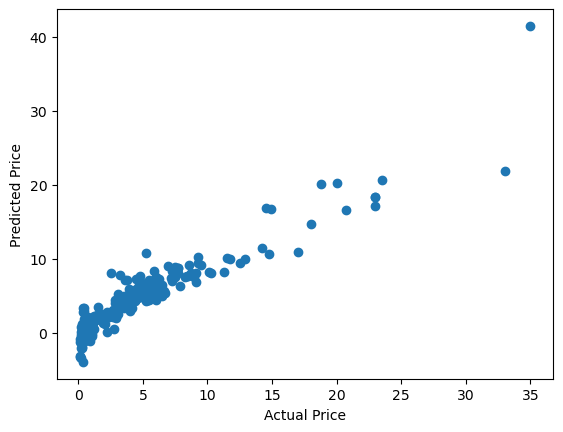

In [109]:
#VISUALIZE REPRESENTATION ACTUAL AND PREDICTED PRICES
plt.scatter(Y_train,training_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [110]:
#PREDICTION OF TEST DATA
test_predict=lin_reg.predict(X_test)
error_score=metrics.r2_score(Y_test,test_predict)
print(error_score)

0.8445122479083079


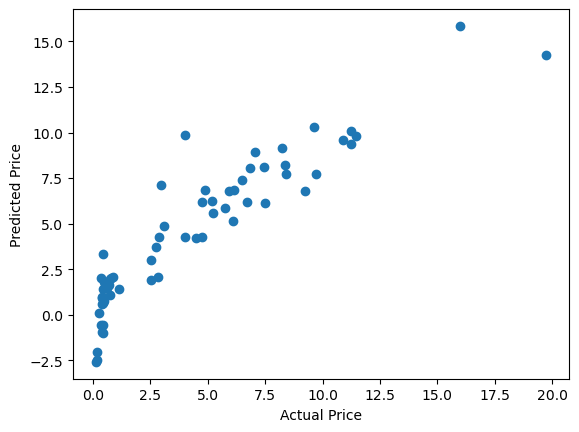

In [111]:
#VISUALIZE REPRESENTATION OF ACTUAL AND PREDICTED PRICES
plt.scatter(Y_test,test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()